In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,\
      MaxPool2D, Conv2D, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint 

In [2]:
IMG_SIZE=28
batch_size=200
epochs=30

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [5]:
classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE,IMG_SIZE,1)))
# classifier.add(BatchNormalization(axis=-1))  
classifier.add(Activation('relu'))

classifier.add(Conv2D(32, (3,3)))
# classifier.add(BatchNormalization(axis=-1))
classifier.add(Activation('relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))
# classifier.add(BatchNormalization(axis=-1))

classifier.add(Conv2D(64, (3,3)))
# classifier.add(BatchNormalization(axis=-1))
classifier.add(Activation('relu'))

classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())
# classifier.add(BatchNormalization())

classifier.add(Dense(512))
# classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [7]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
train_gen = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               shear_range=0.3,
                               height_shift_range=0.1,
                               zoom_range=0.1)
test_gen = ImageDataGenerator()

In [9]:
training_set = train_gen.flow(x_train,y_train,batch_size=batch_size)
test_set = train_gen.flow(x_test,y_test,batch_size=batch_size)

In [10]:
model_save_path = 'straight_bs200e30_tf23.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [14]:
history = classifier.fit(training_set,
                         steps_per_epoch=len(x_train)//batch_size, # 300
                         validation_data=test_set,
                         validation_steps=len(x_test)//batch_size, # 50
                         epochs=epochs,
                         callbacks=[checkpoint_callback])

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.3581 - accuracy: 0.8839
Epoch 00001: val_accuracy improved from -inf to 0.97020, saving model to straight_bs200e30_tf23.h5
300/300 [==============================] - 17s 57ms/step - loss: 0.3581 - accuracy: 0.8839 - val_loss: 0.0907 - val_accuracy: 0.9702
Epoch 2/30
299/300 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9729
Epoch 00002: val_accuracy improved from 0.97020 to 0.98240, saving model to straight_bs200e30_tf23.h5
300/300 [==============================] - 17s 57ms/step - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.0528 - val_accuracy: 0.9824
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9797
Epoch 00003: val_accuracy improved from 0.98240 to 0.98260, saving model to straight_bs200e30_tf23.h5
300/300 [==============================] - 17s 58ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0522 - val_accuracy: 0.9826
Epoch 4/30

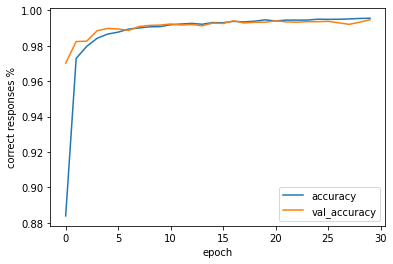

In [15]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

In [16]:
# from google.colab import files
# files.download('straight_bs200e30.h5')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>